# <u>Data Science Essentials</u>

## <u>Topic</u>: ROC Curve / ROC-AUC

## <u>Category</u>: Model Evaluation

### <u>Created By</u>: Mohammed Misbahullah Sheriff
- [LinkedIn](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
)

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier
)

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import (
    train_test_split,
    cross_val_predict,
    StratifiedKFold
)

from sklearn.metrics import (
    roc_auc_score,
    roc_curve
)

## Getting the Data

In [6]:
path = r"/content/titanic.csv"

df = pd.read_csv(path)

X = df.drop(columns="survived")
y = df.survived.copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 8) (712,)
(179, 8) (179,)


## Demo

In [65]:
def get_preprocessor():
  """

  Description:
  ------------
  This function will return a preprocessor object that will preprocess any dataset appropriately

  """
  num_cols = X_train.select_dtypes(include="number").columns
  obj_cols = X_train.select_dtypes(exclude="number").columns

  num_imputer = SimpleImputer(strategy="mean")
  scaler = StandardScaler()

  obj_imputer = SimpleImputer(strategy="most_frequent")
  encoder = OneHotEncoder(handle_unknown="ignore")

  num_pipe = Pipeline(steps=[("imputer", num_imputer),
                             ("scaler", scaler)])

  obj_pipe = Pipeline(steps=[("imputer", obj_imputer),
                             ("encoder", encoder)])

  preprocessor = ColumnTransformer(transformers=[("num", num_pipe, num_cols),
                                                 ("obj", obj_pipe, obj_cols)])

  return preprocessor

In [66]:
def get_model(clf):
  """

  Description:
  ------------
  This function will return the preprocessor and a classifier coupled as a pipeline object

  Parameters:
  -----------
  clf: classifier instance
       The classifier for which to return the model object

  """
  return Pipeline(steps=[
      ("pre", get_preprocessor()),
      ("clf", clf)
  ])

In [67]:
def plot_roc_curve(classifiers):
  """

  Description:
  ------------
  This function will plot the roc curve and display the roc-auc score for given classifiers

  Parameters:
  -----------
  classifiers: list
               Sequence of classifiers to perform the roc evaluation on

  """
  cv = StratifiedKFold(n_splits=5,
                       shuffle=True,
                       random_state=7)

  fig, ax = plt.subplots(figsize=(10, 5))

  ax.plot([0, 1],
          [0, 1],
          linestyle=":",
          color="black",
          label="No-Skill (0.5)")

  for name, clf in classifiers:
    model = get_model(clf)
    y_scores = cross_val_predict(
        model,
        X_train,
        y_train,
        cv=cv,
        n_jobs=-1,
        method="predict_proba"
    )[:, 1]

    fpr, tpr, thresholds = roc_curve(y_train, y_scores)

    ax.plot(fpr,
            tpr,
            label=f"{name} ({roc_auc_score(y_train, y_scores):.3f})")

  ax.set(xlabel="False Positive Rate",
         ylabel="True Positive Rate",
         title="ROC Curves",
         xlim=(0, 1),
         ylim=(0, 1))

  ax.legend(loc="upper left",
            bbox_to_anchor=(1.02, 1),
            title="Classifiers (ROC-AUC)",
            title_fontproperties=dict(weight="bold", size=12))

  plt.tight_layout()
  plt.show()

In [68]:
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC(probability=True)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Ada Boost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

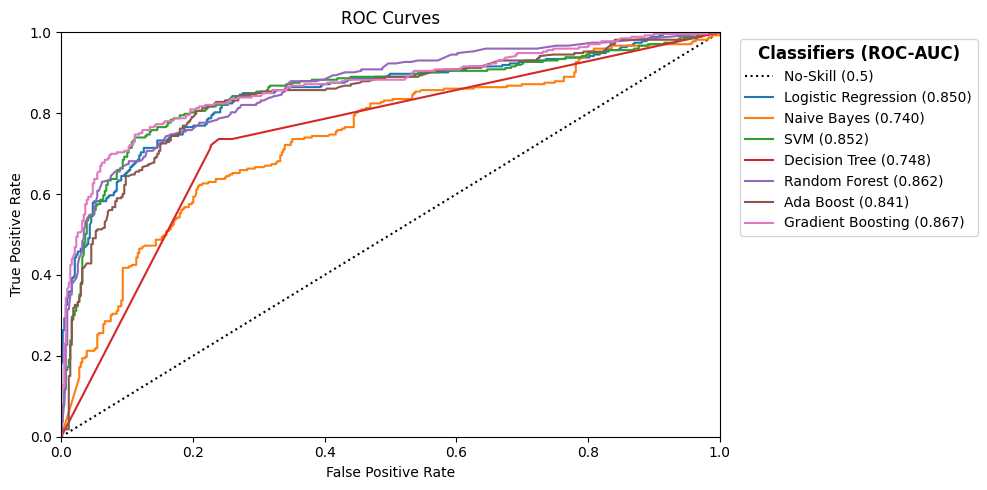

In [70]:
plot_roc_curve(classifiers)

- The above plot displays the ROC Curve of select few algorithms
- The plot legend display the name of the algorithm as well as its ROC AUC score within the parantheses
- It can be observed that the Gradient Boosting model performs the best with a score of 0.867
  - Its curve also seems to be slightly away from the other curves, towards the top-left corner
- The Decision Tree and Naive Bayes models are well behind the other models in terms of performance
- The Logistic Regression and SVM models exhibit comparable performance
- The ensemble models (Random Forest and Gradient Boosting) are ahead of all other models in terms of performance